<img src="img/logo.jpeg" width="200">

# Redes Neuronales y Deep Learning
## Introducción a Redes Neuronales

## Sumario
- Neurona vs. Perceptrón
- Perceptrón simple
- Redes Neuronales
- Vídeos Dot CSV sobre Redes Neuronales.
- Implementación de la clase Perceptrón en Python

## Neurona vs Perceptrón 

- Una neurona del cerebro tiene la capacidad de recibir impulsos eléctricos, decodificarlas y transmitirlas a otras neuronas. Todo ello constituye el principio del funcionamiento del cerebro.  

- El perceptrón es un concepto introducido por Frank Rosenblat en 1958, cuando presentó el primer algoritmo que representaba una red neuronal.


<img src="img/neurona_perceptron.jpeg" width="500">


Como se ve en la imagen anterior,  la similitud está en la capacidad de recibir información, procesarla y tener resultados de salida.  

El *perceptrón*, a diferencia de la *neurona*, no funciona con un impulso eléctrico directo, sino mediante entradas, pesos, bias (sesgo o umbral), procesos matemáticos (sumatorio) y funciones de activación  que dan como resultado la salida.

## Perceptrón Simple
<img src="img/perceptron_extends.png" width="700">

Dónde tenemos los siguientes elementos 
- Variables o datos de entradas, representados con **X**.
- Los pesos relacionados con cada entrada, que se representa con “**w**”.
- El **bias**(sesgo), que es una constante que se añade al cálculo del sumatorio de las entradas y pesos.
- El sumatorio de pesos, entradas y bias.
- La **función de activación** que se aplica al resultado del sumatorio. Existen diferentes tipos de funciones de activación y su selección depende del problema a resolver.
- La salida **Y**, que es el resultado del procesamiento del perceptrón.

### ¿Que sucede con los w (pesos) y los b (bias/sesgos) que hay en la fórmula? ##   
Estos 2 valores son lo que se conoce como *parámetros* de una red neuronal. Suelen ser valores desconocidos y al crear la red neuronal se eligen aleatoriamente.  
Durante el entrenamiento de la red reuronal con el método fit, esta red neuronal va a calcular los parámetros pesos *w* y sesgos *b* más adecuados

### Parámetros: 
Son entrenables y determinan el valor output de la neurona (input*weight + bias): 
 - Bias por cada neurona
 - Weight por cada conexión

A elegir:
 - Función de activación (cómo se calcula el output en función del input) -> Hiperparámetro

## Redes neuronales (Conjunto de perceptrones)

#### Red neuronal

<img src="img/RN2L.jpeg" width="700">   
 
Red neuronal artificial con dos capas ocultas.


Dentro de las capas ocultas (hidden layer), cada nodo es un perceptrón. La cantidad de capas ocultas y perceptrones dependen al problema a resolver.

### Vídeos Dot CSV sobre Redes Neuronales ###
- [¿Qué es una Red Neuronal? Parte 1](https://www.youtube.com/watch?v=MRIv2IwFTPg)
- [¿Qué es una Red Neuronal? Parte 2](https://www.youtube.com/watch?v=uwbHOpp9xkc)

## Implementación de la clase PERCEPTRÓN en Python ##

Ahora veremos cómo construir un perceptrón desde cero ya que los utilizaremos para construir redes complejas.  
Los perceptrones simples o monocapa sólo son capaces de aprender patrones linealmente separables.  
La parte de aprendizaje/entrenamiento es el proceso de encontrar los pesos que minimizan el error de la salida.


En primer lugar, vamos a crear un conjunto de datos. Lo haremos tomando muestras de dos distribuciones normales distintas
que vamos a crear, etiquetando los datos según la distribución.  
Después entrenaremos nuestro perceptrón para distinguirlas:

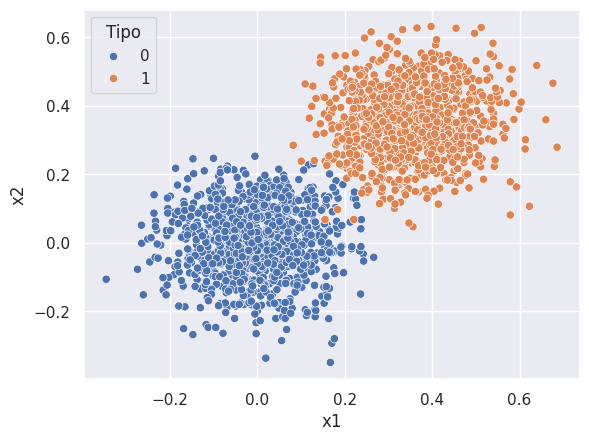

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

# Inicializamos una semilla
np.random.seed(11)

#### Creación del dataset de pruebas

# Media y desviación standard para generar la primera de las clases (x)
mu_x1, sigma_x1 = 0, 0.1
# Generar la segunda distribución y diferenciarla de la primera
x2_mu_diff = 0.35
# Creando la primera distribución
d1 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000),'x2': np.random.normal(mu_x1, sigma_x1 , 1000),'Tipo': 0})
# Creando la segunda distribución
d2 = pd.DataFrame({'x1': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff, 'x2': np.random.normal(mu_x1, sigma_x1 , 1000) + x2_mu_diff, 'Tipo': 1})
data = pd.concat([d1, d2], ignore_index=True) 
ax = sns.scatterplot(x="x1", y="x2", hue="Tipo", data=data)


Como podemos observar, las dos distribuciones son linealmente separables, por lo que es una tarea apropiada
para nuestro modelo.   

A continuación, vamos a crear una clase simple para implementar el perceptrón. 
Sabemos que nuestros datos de entrada tienen dos elementos de entrada (las coordenadas en nuestro gráfico) y una salida binaria (el tipo de punto de datos), que se distinguen por diferentes colores.

Necesitamos dos pesos, uno para cada entrada, más uno extra para representar el término de sesgo de nuestra ecuación.
nuestra ecuación. Representaremos el sesgo como un peso que siempre recibe una entrada igual a 1. Esto facilitará la optimización.  

Seguidamente tenemos que añadir los métodos para calcular la predicción de nuestra clase, que es la que implementa la fórmula matemática. Obviamente, cuando lo empezamos, no sabemos
los pesos (para eso entrenamos el modelo), pero necesitamos algunos valores para empezar, así que los inicializamos a un valor arbitrario.  

Utilizaremos la función escalón ('step') como nuestra función de activación para la neurona artificial, que será el filtro que decida si la señal debe pasar :   

```python
        def step_function(self, z):   
            if z >= 0:   
              return 1      
            else:  
              return 0
```


La entrada será sumada y multiplicada por los pesos, por lo que necesitaremos implementar un método que tome dos variables de entrada y devuelva su suma ponderada.
El término de sesgo está indicado por el término **self.w0**, que siempre se multiplica por la unidad:

```python
    def weighted_sum_inputs(self, x1, x2):
        return sum([1 * self.w0, x1 * self.w1, x2 * self.w2])

```


Ahora, tenemos que implementar la función de predicción, que utiliza las funciones que hemos definido en
el bloque de código anterior para calcular la salida de la neurona:

```python
    def predict(self, x1, x2):
        """
        Usando la función 'step' para determinar la salida
        """
        z = self.weighted_sum_inputs(x1, x2)
        return self.step_function(z)
```

NOTA: Más adelante se verá que es mejor elegir funciones de activación que sean fácilmente derivables, ya que el descenso de gradiente es la forma más conveniente de entrenar una red.

La fase de entrenamiento, en la que se calculan los pesos, es un proceso sencillo que se implementa
con el siguiente método de ajuste. Es necesario proporcionar a este método la entrada, la salida
y dos parámetros más: el número de épocas y el tamaño del paso (step).
Una época es un único paso en el entrenamiento de nuestro modelo, y termina cuando todas las muestras de entrenamiento se utilizan para actualizar los pesos.   
Para las RN, a menudo es necesario entrenar durante cientos de épocas, si no más, pero en este ejemplo una será suficiente.   

El tamaño del paso (o tasa de aprendizaje) es un parámetro que ayuda a controlar el efecto de las nuevas actualizaciones en los pesos actuales. El teorema de convergencia del perceptrón establece que un perceptrón convergerá si las clases son linealmente separables, independientemente de la tasa de aprendizaje.  

En cambio, para las RN, la tasa de aprendizaje es muy importante. Cuando se utiliza el descenso gradiente, este determina la velocidad de convergencia y puede indicar el grado de proximidad a los mínimos de la función de error. Un tamaño de paso grande puede hacer que el entrenamiento salte
alrededor de los mínimos locales, mientras que un tamaño de paso demasiado pequeño hará que el entrenamiento sea demasiado lento.

En el siguiente bloque de código, tenemos el código para el método que se debe  añadir a la clase del perceptrón para realizar el entrenamiento:

```python

    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        """
        Entrenamiento del modelo
        """
        errors = []
        for epoch in range(epochs):
            error = 0
            for i in range(0, len(X.index)):
                x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]
                # La actualización es proporcional al tamaño del 'step' y del error
                update = step * (target - self.predict(x1, x2))
                self.w1 += update * x1
                self.w2 += update * x2
                self.w0 += update
                error += int(update != 0.0)
                errors.append(error)
                if verbose:
                    print('Epocas: {} - Error: {} - Errores de todas las epocas: {}'.format(epoch, error, errors))
                    
```


El proceso de entrenamiento calcula la actualización del peso multiplicando el tamaño del paso (o tasa de aprendizaje) por la diferencia entre la salida real y la predicción.  
A continuación, este error ponderado se multiplica por cada entrada y se añade al peso correspondiente. Es una estrategia de actualización sencilla que nos permitirá dividir la región en dos y clasificar nuestros datos. Esta estrategia de aprendizaje se conoce como la **Regla de Aprendizaje del Perceptrón**, y es posible demostrar que, si el problema es linealmente separable, entonces la **Regla de Aprendizaje del Perceptrón** encontrará un conjunto de pesos que resuelva el problema en un número finito de iteraciones.   

También se ha añadido alguna funcionalidad de control de errores, por lo que es posible probarlo con más épocas y ver cómo el error se ve afectado por ello.   

La clase perceptrón está ahora completa; necesitamos crear un conjunto de entrenamiento y uno de prueba para entrenar la red y validar sus resultados.  Más adelante se verá que es una práctica altamente recomendable utilizar también un conjunto de validación. Sin embargo en este ejemplo, lo omitiremos, ya que queremos centrarnos en el proceso de entrenamiento. También es una buena práctica utilizar la validación cruzada, pero también la omitiremos, ya que sólo utilizaremos un conjunto de entrenamiento y uno de prueba, por simplicidad.   

### CLASE PERCEPTRÓN ###

In [2]:
## Clase PERCEPTRON
class Perceptron(object):
    """
    Implementación básica del algoritmo PERCEPTRON
    """
    def __init__ (self, w0=1, w1=0.1, w2=0.1):
        # weights
        self.w0 = w0 # bias
        self.w1 = w1
        self.w2 = w2


    def step_function(self, z):
        if z >= 0:
            return 1
        else:
            return 0


    def weighted_sum_inputs(self, x1, x2):
        return sum([1 * self.w0, x1 * self.w1, x2 * self.w2])


    def predict(self, x1, x2):
        """
        Usando la función 'step' para determinar la salida
        """
        z = self.weighted_sum_inputs(x1, x2)
        return self.step_function(z)


    def predict_boundary(self, x):
        """
        Predicción de los límites de decisión del clasificador
        """
        return -(self.w1 * x + self.w0) / self.w2

    
    
    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        """
        Entrenamiento del modelo
        """
        errors = []
        for epoch in range(epochs):
            error = 0
            for i in range(0, len(X.index)):
                x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]
                # La actualización es proporcional al tamaño del 'step' y del error
                update = step * (target - self.predict(x1, x2))
                self.w1 += update * x1
                self.w2 += update * x2
                self.w0 += update
                error += int(update != 0.0)
                errors.append(error)
                if verbose:
                    print('Epocas: {} - Error: {} - Errores de todas las epocas: {}'.format(epoch, error, errors))

Ahora que tenemos todo lo que necesitamos para el entrenamiento, inicializaremos los pesos a un número cercano a cero y realizaremos el entrenamiento:
```python
    my_perceptron = Perceptron(0.1,0.1)
    my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)
```

Para comprobar el rendimiento del algoritmo, podemos utilizar la matriz de confusión, que muestra todas las predicciones correctas y las clasificaciones erróneas. Como se trata de una tarea binaria, tendremos tres opciones posibles para el resultado: correcto, falso positivo o falso negativo:
```python
    pred_y = test_x.apply(lambda x: my_perceptron.predict(x.x1, x.x2), axis=1)
    cm = confusion_matrix(test_y, pred_y, labels=[0, 1])
    print(pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1']))
```

El bloque de código anterior producirá la siguiente salida:   

| | Pred 0 | Pred 1|
| :--: | :--: | :--: |
| 0 Verdadero | 190 | 5 |
| 1 Verdadero | 0 | 201 |

También podemos visualizar estos resultados en el espacio de entrada ploteando la línea de la frontera de decisión.   
Para ello, se añade el siguiente método en la clase perceptrón:   

```python
    def predict_boundary(self, x):
        """
        Predicción de los límites del clasificador
        """
        return -(self.w1 * x + self.w0) / self.w2

```

Para encontrar la línea de la frontera, es necesario encontrar los puntos que satisfacen la ecuación:    
**x2 * w2 + x1 * w1 + w0 = 0**.   

A continuación, se grafica dicha línea en el bloque de código que sigue: 
```python
    ax = sns.scatterplot(x="x1", y="x2", hue="Tipo",
    data=data[~msk])
    ax.autoscale(False)
    x_vals = np.array(ax.get_xlim())
    y_vals = my_perceptron.predict_boundary(x_vals)
    ax.plot(x_vals, y_vals, '--', c="red")
```


Epocas: 0 - Error: 1 - Errores de todas las epocas: [1]
Epocas: 0 - Error: 2 - Errores de todas las epocas: [1, 2]
Epocas: 0 - Error: 3 - Errores de todas las epocas: [1, 2, 3]
Epocas: 0 - Error: 4 - Errores de todas las epocas: [1, 2, 3, 4]
Epocas: 0 - Error: 5 - Errores de todas las epocas: [1, 2, 3, 4, 5]
Epocas: 0 - Error: 6 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6]
Epocas: 0 - Error: 7 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7]
Epocas: 0 - Error: 8 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8]
Epocas: 0 - Error: 9 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Epocas: 0 - Error: 10 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Epocas: 0 - Error: 11 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Epocas: 0 - Error: 12 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Epocas: 0 - Error: 13 - Errores de todas las epocas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Epocas: 0 - Error: 14 - 

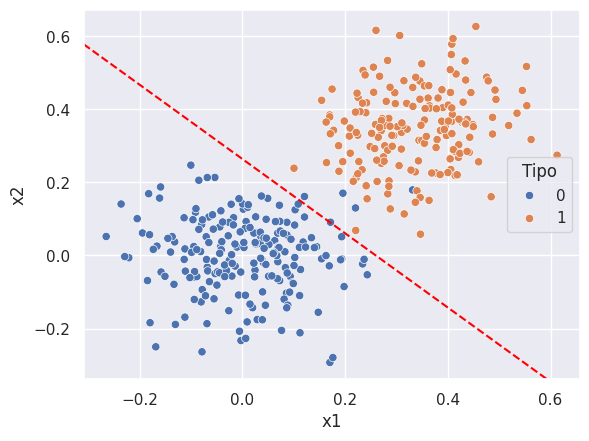

In [3]:
# División conjuntos TRAIN/TEST
msk = np.random.rand(len(data)) < 0.8
# El 80% de los datos para el conjunto TRAIN
train_x, train_y = data[['x1','x2']][msk], data.Tipo[msk]
# El resto, al conjunto de TEST
test_x, test_y = data[['x1','x2']][~msk], data.Tipo[~msk]

my_perceptron = Perceptron(0.1,0.1)
my_perceptron.fit(train_x, train_y, epochs=1, step=0.005)

pred_y = test_x.apply(lambda x: my_perceptron.predict(x.x1, x.x2), axis=1)
cm = confusion_matrix(test_y, pred_y, labels=[0, 1])
print(pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Predicted 0', 'Predicted 1']))

# Mostrar la línea límite de decisión al gráfico de dispersión
ax = sns.scatterplot(x="x1", y="x2", hue="Tipo",
data=data[~msk])
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = my_perceptron.predict_boundary(x_vals)
ax.plot(x_vals, y_vals, '--', c="red")

También es posible calcular una salida contínua, no sólo binaria; basta con utilizar una función de activación contínua, como, por ejemplo, la *función logística*. Con esta elección,
el mismo perceptrón se convierte en un modelo de regresión logística.

## <img src="img/by-nc.png" width="200">